## 2. Виконати проєктування програмного додатку для PC, який:

### a. виконує інвертування кольорової інтенсивності пікселів завантаженого користувачем зображення. Вивести вхідне та отримане зображення;

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

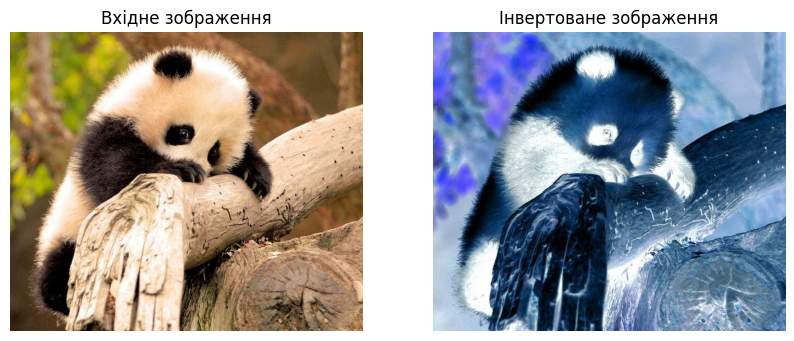

In [2]:
def invert_image(image_path):
    image = cv2.imread(image_path)
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    inverted_image = cv2.bitwise_not(image_rgb)
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image_rgb)
    axes[0].set_title("Вхідне зображення")
    axes[0].axis("off")
    
    axes[1].imshow(inverted_image)
    axes[1].set_title("Інвертоване зображення")
    axes[1].axis("off")
    
    plt.show()

invert_image('panda.jpg')

### b. для деякої (однієї з трьох) компонент виконує зміну, наприклад, до кожного пікселя додає якесь постійне значення. Вивести усі зображення в об’єкти типу ImageView.

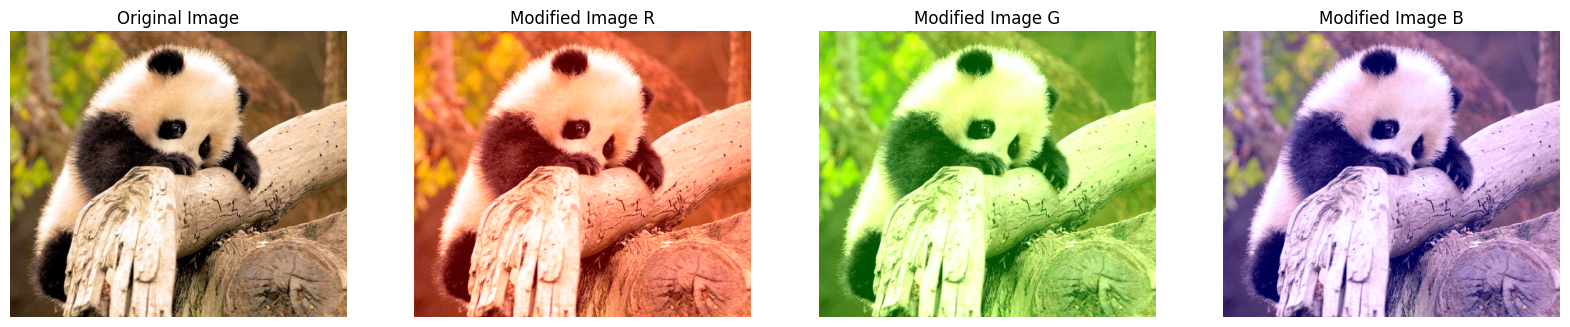

In [22]:
def modify_image_channels(image_path):
    image = cv2.imread(image_path)
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    R, G, B = cv2.split(image_rgb)
    
    R_mod = cv2.add(R, 80)
    G_mod = cv2.add(G, 80)
    B_mod = cv2.add(B, 80)
    
    image_modified_G = cv2.merge([R, G_mod, B])
    image_modified_R = cv2.merge([R_mod, G, B])
    image_modified_B = cv2.merge([R, G, B_mod])
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")
    
    axes[1].imshow(image_modified_R)
    axes[1].set_title("Modified Image R")
    
    axes[2].imshow(image_modified_G)
    axes[2].set_title("Modified Image G")
    
    axes[3].imshow(image_modified_B)
    axes[3].set_title("Modified Image B")
    
    for ax in axes:
        ax.axis("off")
    
    plt.show()

modify_image_channels('panda.jpg')


### c. виконує розбивку зображення на компоненти Red, Green та Blue.

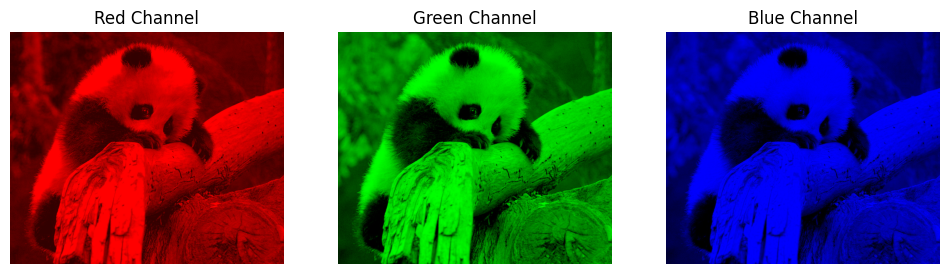

In [23]:
image = cv2.imread("panda.jpg") 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

B, G, R = cv2.split(image)

R_mod = cv2.add(R, 50) 
G_mod = cv2.add(G, 50) 
B_mod = cv2.add(B, 50) 


image_R = cv2.merge([R_mod, np.zeros_like(G), np.zeros_like(B)]) 
image_G = cv2.merge([np.zeros_like(R), G, np.zeros_like(B)]) 
image_B = cv2.merge([np.zeros_like(R), np.zeros_like(G), B])  


fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image_R)
axes[0].set_title("Red Channel") 
axes[1].imshow(image_G)
axes[1].set_title("Green Channel")
axes[2].imshow(image_B)
axes[2].set_title("Blue Channel")

for ax in axes:
    ax.axis("off")

plt.show()


### d. виконує «злиття» двох зображень у певних пропорціях (долях від одиниці, яка береться за 100%). Наприклад, якщо «вклад» першого зображення у нове складає 0.4, то «вклад» другого – 1-0.4=0.6. У загальному «вклад» першого зображення позначимо через α, а «вклад» другого – (1 − α). Тоді шукане зображення можна записати у наступному вигляді: Imagenew = α ∙ Image1 + (1 − α)Image2.

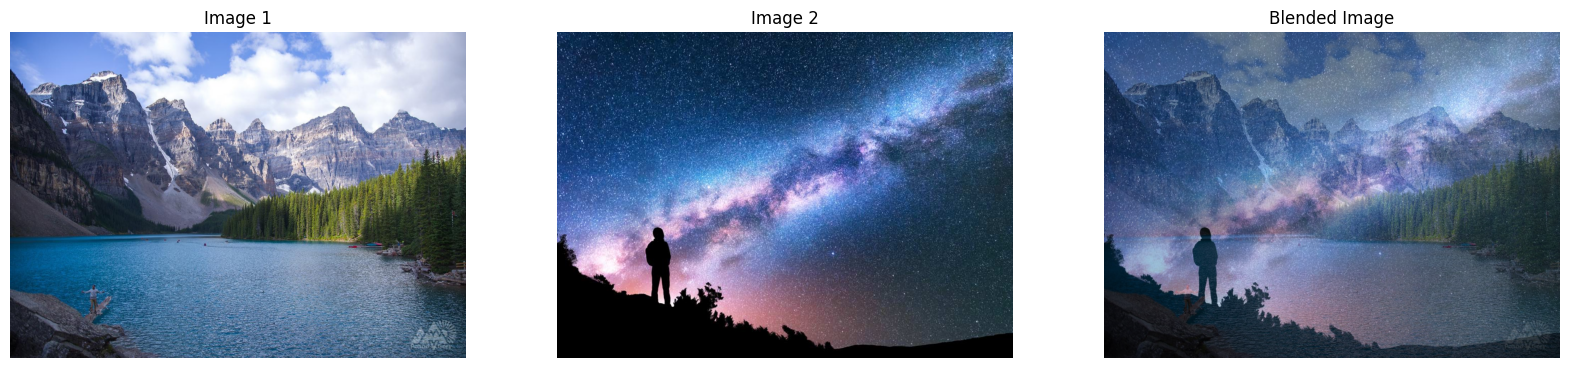

In [12]:
def blend_images(image_path1, image_path2, alpha=0.4):
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)
    
    image1 = cv2.resize(image1, (900, 644))
    image2 = cv2.resize(image2, (900, 644))
    
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    
    image_blended = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)
    
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    
    axes[0].imshow(image1)
    axes[0].set_title("Image 1")
    
    axes[1].imshow(image2)
    axes[1].set_title("Image 2")
    
    axes[2].imshow(image_blended)
    axes[2].set_title(f"Blended Image")
    
    for ax in axes:
        ax.axis("off")
    
    plt.show()

blend_images('lake.jpg', 'sky.jpg')


#### Додаткове до d

In [11]:
import matplotlib.animation as animation

image1 = cv2.imread("lake.jpg")
image2 = cv2.imread("sky.jpg")

size = (900, 644)
image1 = cv2.resize(image1, size)
image2 = cv2.resize(image2, size)


image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


cv2.namedWindow("Blended Animation", cv2.WINDOW_NORMAL)

# Анімація змішування
for alpha in np.linspace(0, 1, 100):
    blended = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)
    cv2.imshow("Blended Animation", cv2.cvtColor(blended, cv2.COLOR_RGB2BGR))
    if cv2.waitKey(50) & 0xFF == ord("q"):
        break

cv2.destroyAllWindows()


### e. виконує фільтрацію вхідного зображення з використанням матричних фільтрів, що описані у лабораторній роботі (фільтр розмиття, фільтр поліпшення чіткості, медіанний фільтр, фільтр ерозії і нарощування та фільтр Собеля).

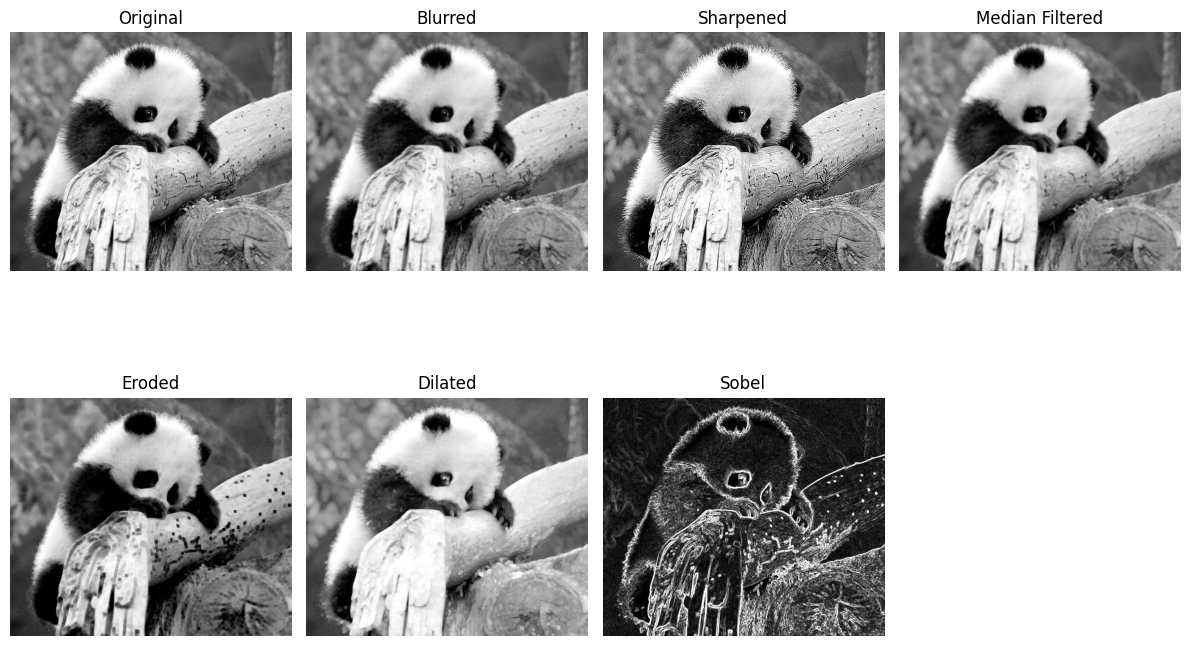

In [ ]:
image = cv2.imread("panda.jpg", cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(image, (5, 5), 0)

sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv2.filter2D(image, -1, sharpening_kernel)

median_filtered = cv2.medianBlur(image, 5)

kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(image, kernel, iterations=1)

dilated = cv2.dilate(image, kernel, iterations=1)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)
sobel = cv2.convertScaleAbs(sobel)

titles = ["Original", "Blurred", "Sharpened", "Median Filtered", "Eroded", "Dilated", "Sobel"]
images = [image, blurred, sharpened, median_filtered, eroded, dilated, sobel]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


### Додаткове завдання

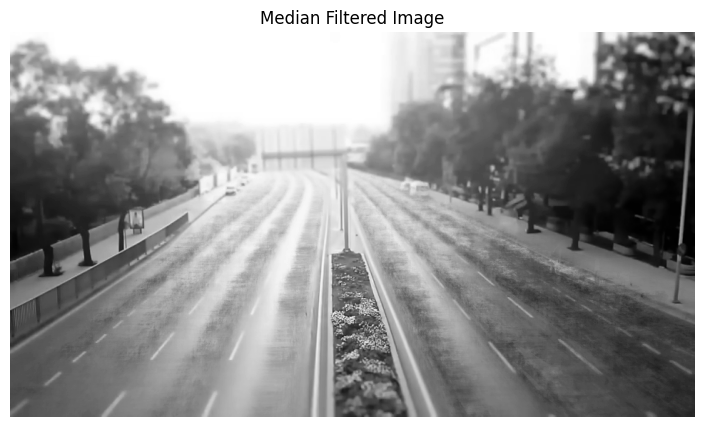

In [ ]:
video_path = "videoplayback1.mp4" 
cap = cv2.VideoCapture(video_path)


frames = []
k = 5  # Кожен k-й кадр для пришвидшення руху
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    if frame_count % k == 0:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(frame)
    
    frame_count += 1

cap.release()


frames = np.array(frames)


median_filtered = np.median(frames, axis=0).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered Image")
plt.axis("off")
plt.show()

